In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("bike_sharing.csv")

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## <font color='purple'>1. Define Problem Statement and perform Exploratory Data Analysis.</font>

### <font color='purple'>Definition of problem (as per given problem statement with additional views)</font>

### Problem Statement

As cities continue to expand, sustainable transportation options like **bike-sharing systems** have become increasingly popular. These systems allow users to rent bicycles for short trips, reducing congestion, pollution, and dependency on private vehicles. 

However, one major challenge faced by bike-sharing companies is **understanding and predicting the demand for bikes**. Demand varies based on multiple factors such as **season, weather conditions, temperature, humidity, working days, holidays, and time of the year**. 

the main goal is to analyze this dataset to:
- Understand **how different factors influence the number of bikes rented**.
- Identify **patterns and trends** in user behavior.
- Provide **data-driven recommendations** to optimize operations, bike availability, and customer satisfaction.

This analysis aims to help management make better business decisions such as:
- **Forecasting demand** for future planning.
- **Improving fleet management** by ensuring bikes are available when and where they’re needed most.
- **Designing marketing strategies** based on customer usage patterns.
- **Enhancing profitability** by aligning resources with customer demand patterns.

By combining exploratory data analysis and statistical insights, this project will deliver a **clear understanding of demand behavior** and guide **strategic business decisions** for improved efficiency and customer experience.


**Objectives**
1. Analyze the key factors that affect bike rental counts.
2. Identify seasonal and temporal trends influencing usage.
3. Understand how weather variables (temperature, humidity, windspeed) impact rentals.
4. Recommend strategies to optimize inventory and operations.



### <font color='purple'>Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.</font>

In [6]:
df.shape

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns are present in the dataset ")

There are 10886 rows and 12 columns are present in the dataset 


In [7]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.7 MB


In [9]:
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')


In [10]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
df.describe(include = "category")

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [12]:
df["datetime"]  = pd.to_datetime(df["datetime"])

In [13]:
df.info(memory_usage = "deep") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [14]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [15]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [16]:
df["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [17]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [18]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

### Missing value detection

In [19]:
Missing_value = pd.DataFrame({"missing_value":df.isnull().sum(), "Percentage":((df.isnull().sum())/len(df))*100})
Missing_value 

,missing_value,Percentage
datetime,0,0.0
season,0,0.0
holiday,0,0.0
workingday,0,0.0
weather,0,0.0
temp,0,0.0
atemp,0,0.0
humidity,0,0.0
windspeed,0,0.0
casual,0,0.0


There in no Missing values present in the dataset

### Outliers treatment

**IQR Method**

In [20]:
df_num = df.select_dtypes(include = np.number)

In [21]:
df_num.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

In [22]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3-Q1

In [23]:
df_iqr = df[~(df_num < (Q1 - (1.5*IQR)))|(df_num > (Q3 + (1.5 * IQR)))]

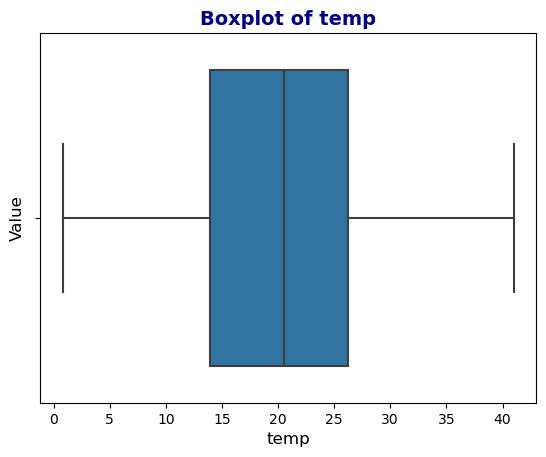

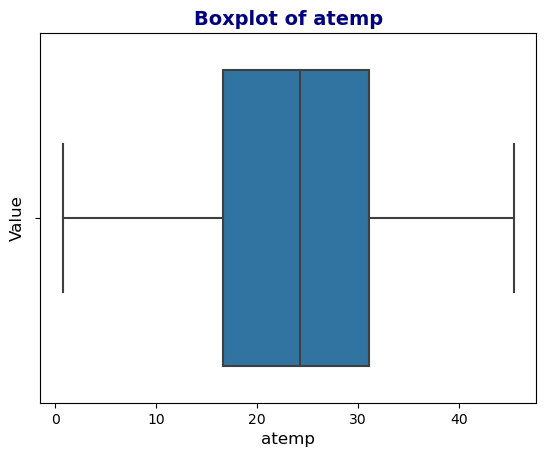

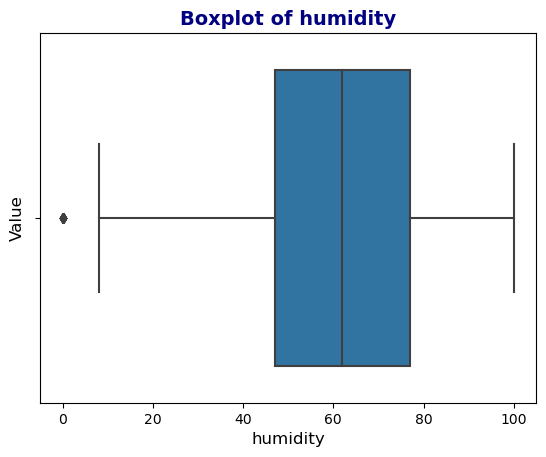

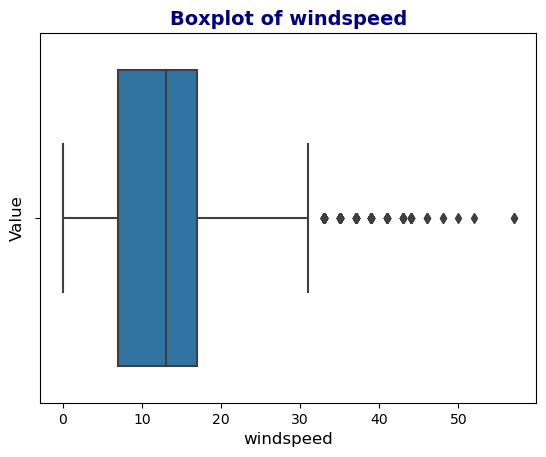

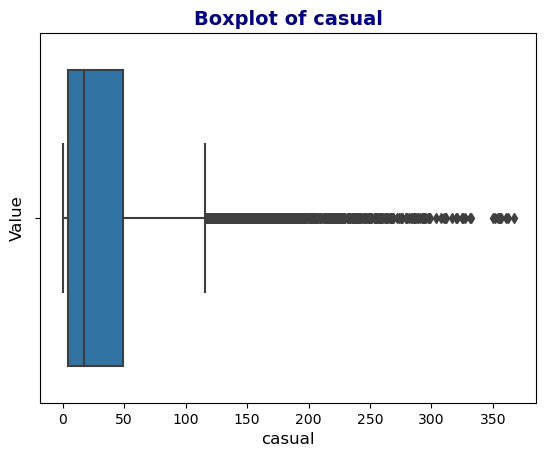

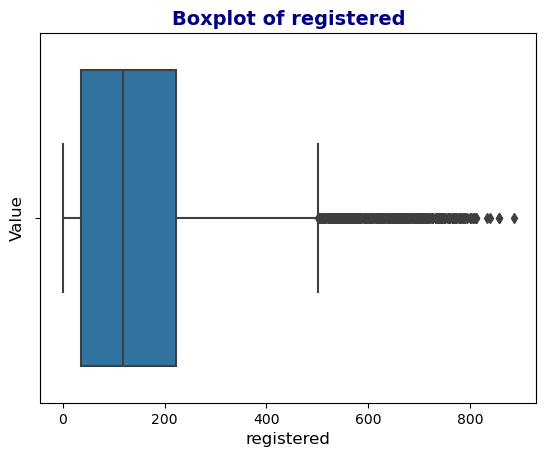

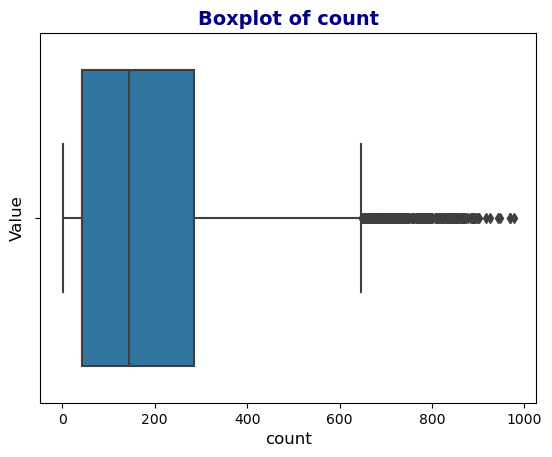

In [24]:
for col in df_num.columns:
    sns.boxplot(x = col, data = df_num, orient='v')
    plt.title(f'Boxplot of {col}', fontsize=14, weight='bold', color='navy')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.show()



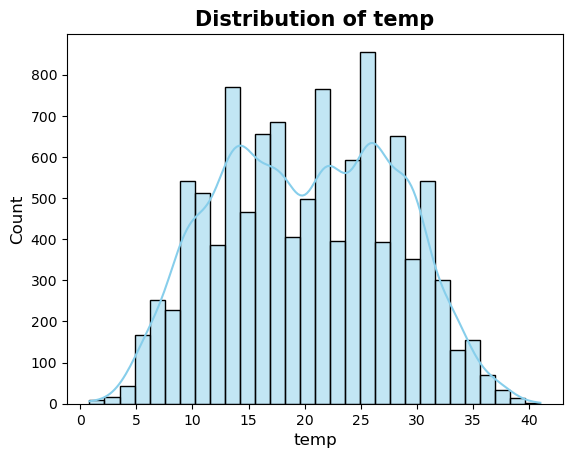

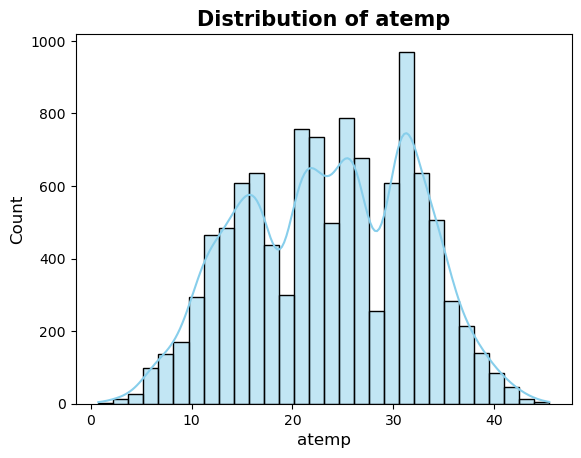

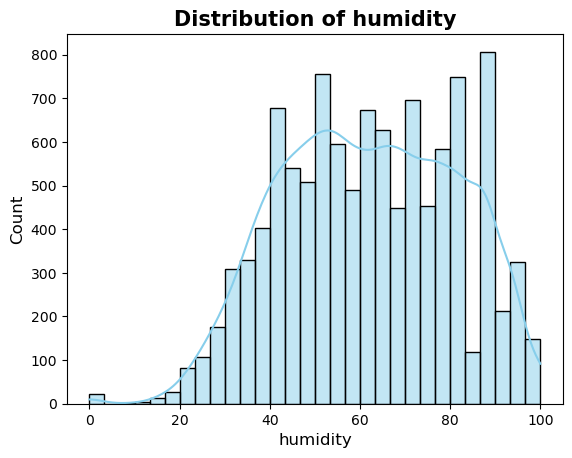

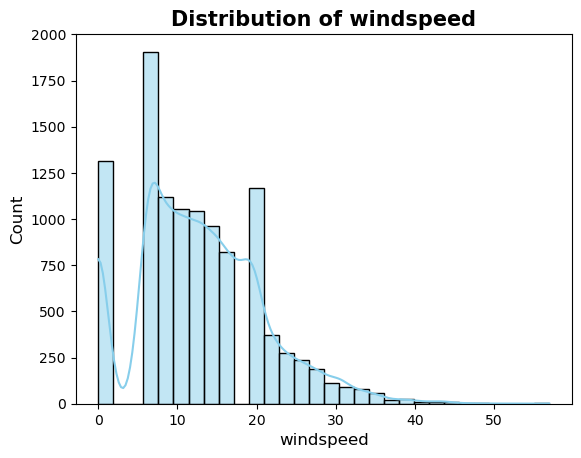

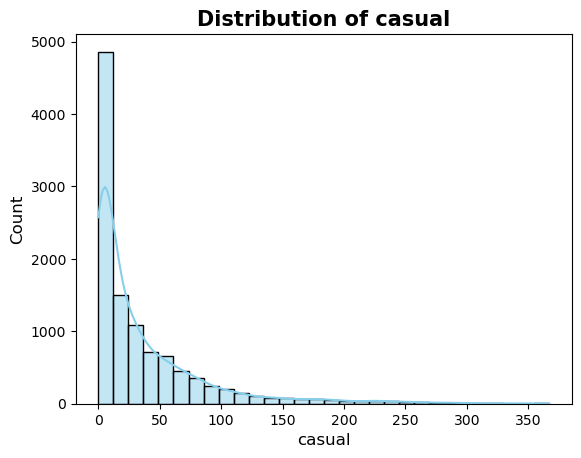

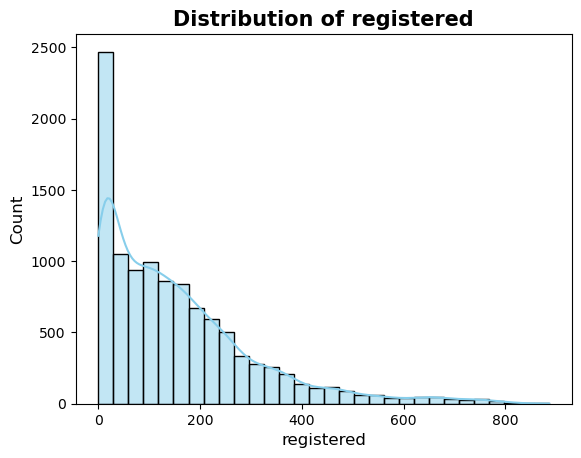

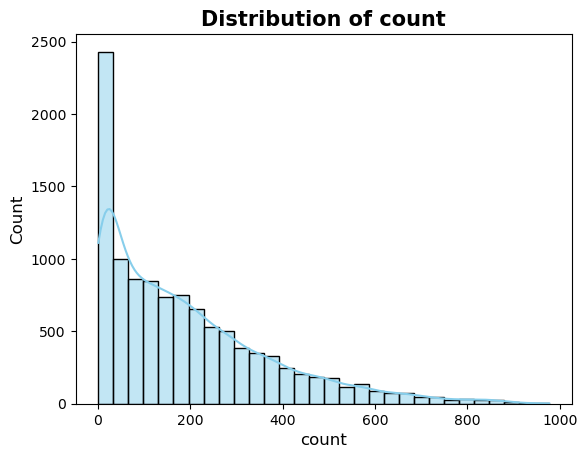

In [25]:
for col in df_num.columns:
    sns.histplot(df[col],  kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=15, weight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()


**Z Score method**

In [26]:
from scipy.stats import zscore

In [36]:
z_score_threshold = 3

z_score = np.abs(zscore(df_num))

df_zscore = df[(z_score < z_score_threshold).all(axis = 1)]

In [37]:
df_zscore

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [38]:
df.shape

(10886, 12)

In [39]:
df_zscore.shape

(10272, 12)

- zscore method is best when data approximates a **normal Distribution**

### <font color='purple'>Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)</font>



**Numerical variable**

In [42]:
df_num.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

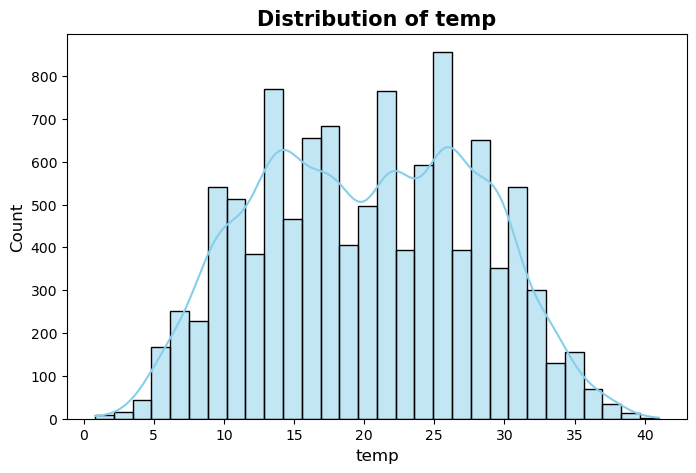

In [43]:
plt.figure(figsize = (8, 5))
sns.histplot(df['temp'],  kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of temp', fontsize=15, weight='bold')
plt.xlabel('temp', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
    


In [50]:
df["temp"].skew()

0.003690844422472008

In [51]:
df["temp"].kurt()

-0.9145302637630794

- temperature data looks quite normal-like, with no major skew and slightly less peakedness than normal — meaning most temperatures are close to the average, and extreme highs/lows are rare.

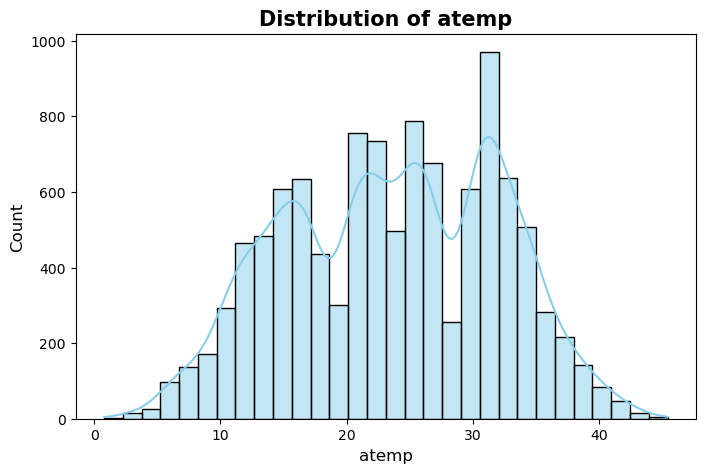

In [44]:
plt.figure(figsize = (8, 5))
sns.histplot(df['atemp'],  kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of atemp', fontsize=15, weight='bold')
plt.xlabel('atemp', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [64]:
df["atemp"].skew()

-0.10255951346908665

In [53]:
df["atemp"].kurt()

-0.8500756471754651

- skewness is -0.102 The skewness is very close to 0, and only slightly negative,This means  apparent temperature data is almost symmetric,with a tiny tendency toward lower temperatures — but nothing significant.
- Kurtosis = -0.8501 The distribution is flatter than a normal curve,meaning there are fewer extreme apparent temperature values (no heavy tails) and most observations are spread evenly around the average.

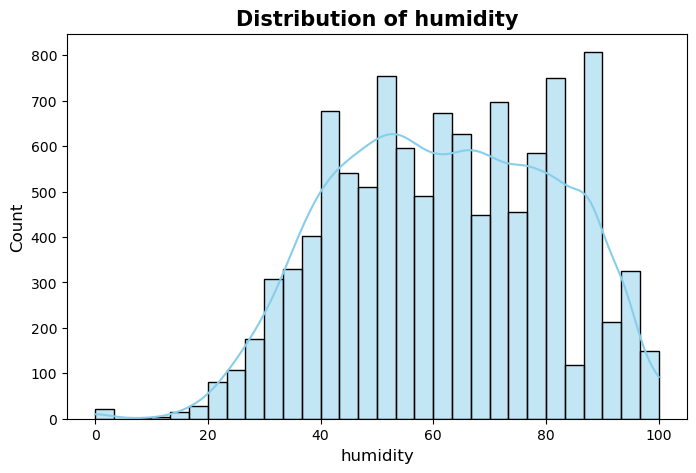

In [45]:
plt.figure(figsize = (8, 5))
sns.histplot(df['humidity'],  kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of humidity', fontsize=15, weight='bold')
plt.xlabel('humidity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [54]:
df["humidity"].skew()

-0.08633518364548581

In [55]:
df["humidity"].kurt()

-0.7598175375208864

- The skewness is -0.0863, which is very close to 0. This means humidity values are almost perfectly symmetric, there’s no noticeable lean toward very low or very high humidity.
- The kurtosis is -0.7598, which means the humidity distribution is flatter than normal. There are fewer extreme humidity levels, and most values are moderately distributed around the mean.

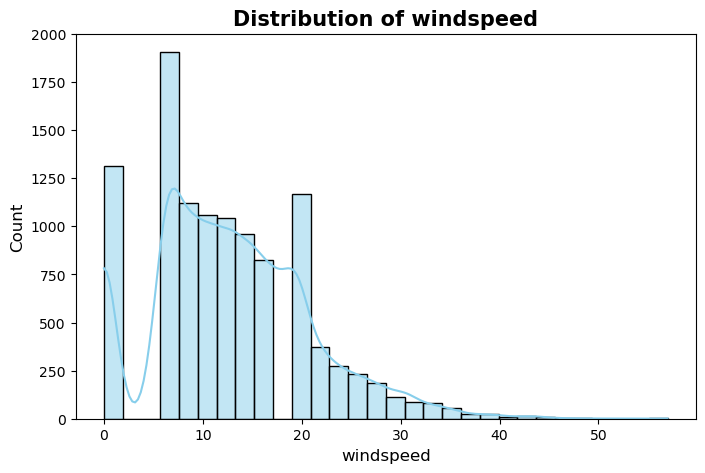

In [46]:
plt.figure(figsize = (8, 5))
sns.histplot(df['windspeed'],  kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of windspeed', fontsize=15, weight='bold')
plt.xlabel('windspeed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [56]:
df["windspeed"].skew()

0.5887665265853944

In [57]:
df["windspeed"].kurt()

0.6301328693364932

- The skewness is 0.5888, which is moderately positive. This means the wind speed distribution is right-skewed most wind speeds are on the lower side, but there are a few instances of high wind speeds (long right tail).
- The kurtosis is 0.63, which is slightly positive.That means the wind speed distribution is a bit more peaked than normal suggesting some extreme wind events (both very low and very high) occur more often than in a perfectly normal distribution.

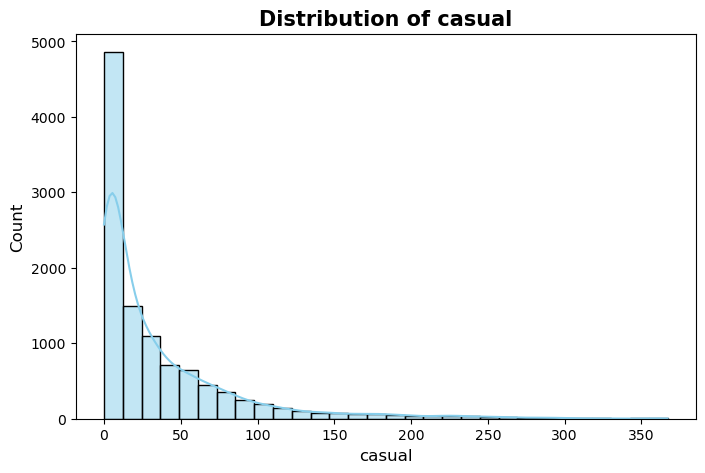

In [47]:
plt.figure(figsize = (8, 5))
sns.histplot(df['casual'],  kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of casual', fontsize=15, weight='bold')
plt.xlabel('casual', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [58]:
df["casual"].skew()

2.4957483979812567

In [59]:
df["casual"].kurt()

7.551629305632764

- The skewness is strongly positive (≈ 2.5) The distribution is highly right-skewed. Most of the values are low (few casual riders on many days), but there are some days with very high casual counts likely weekends or holidays when casual ridership spikes.
- The kurtosis of 7.55 is very high, meaning the data is extremely peaked and heavy-tailed. There are many extreme values — days with unusually high casual ridership far from the mean.

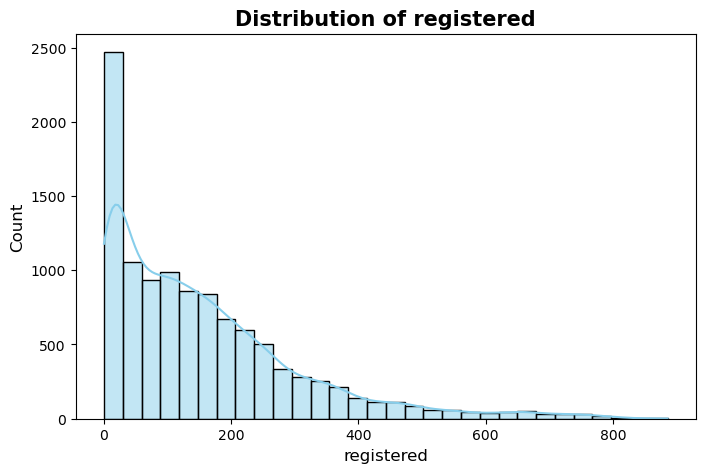

In [48]:
plt.figure(figsize = (8, 5))
sns.histplot(df['registered'],  kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of registered', fontsize=15, weight='bold')
plt.xlabel('registered', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [60]:
df["registered"].skew()

1.5248045868182296

In [61]:
df["registered"].kurt()

2.6260809999210672

- The skewness of 1.52 means the distribution is moderately to strongly right-skewed.This tells us that most days have moderate registered user counts,but some days show very high registrations — possibly due to better weather, weekdays, or special events.
- The kurtosis of 2.63 indicates that the data is more peaked than normal, meaning there are some extreme values (days with unusually high registered user counts). It shows a concentration of most values around the mean with some significant outliers.

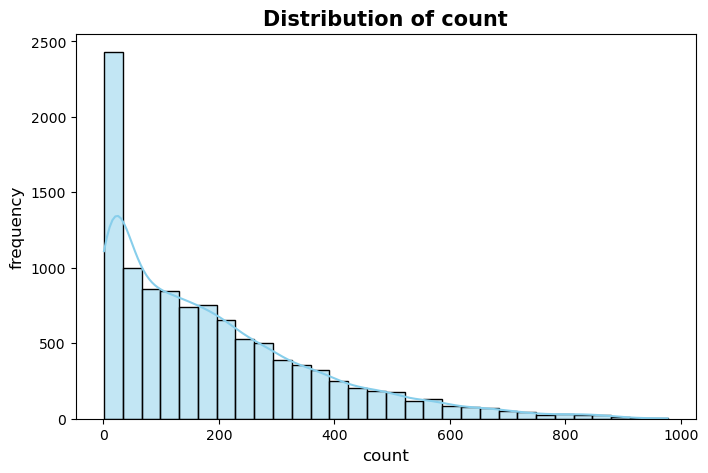

In [49]:
plt.figure(figsize = (8, 5))
sns.histplot(df['count'],  kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of count', fontsize=15, weight='bold')
plt.xlabel('count', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.show()

In [62]:
df["count"].skew()

1.2420662117180776

In [63]:
df["count"].kurt()

1.3000929518398334

- The skewness is 1.24, which means the distribution is positively (right) skewed. Most days have lower or moderate total user counts,but some days show very high total usage — likely weekends, holidays, or peak-season days.
- The kurtosis is 1.3, which means the distribution is slightly more peaked than normal.This suggests that most values are concentrated around the average, but there are also a few extreme high values (heavy tails).

**Categorical variable**

In [66]:
df.select_dtypes(include = "category").columns

Index(['season', 'holiday', 'workingday', 'weather'], dtype='object')

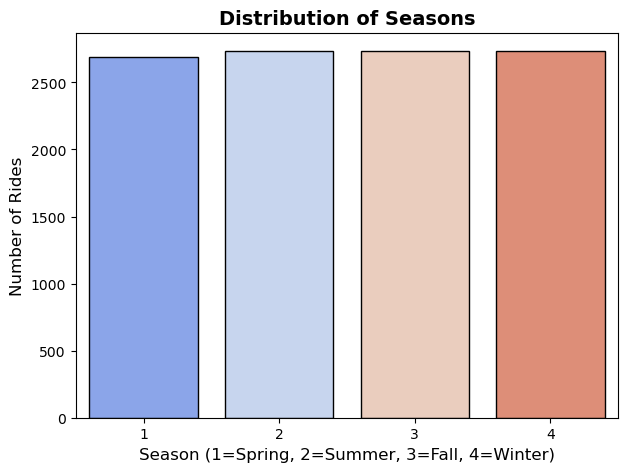

In [104]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="season", palette="coolwarm", edgecolor="black")
plt.xlabel("Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Distribution of Seasons", fontsize=14, weight='bold')
plt.show()



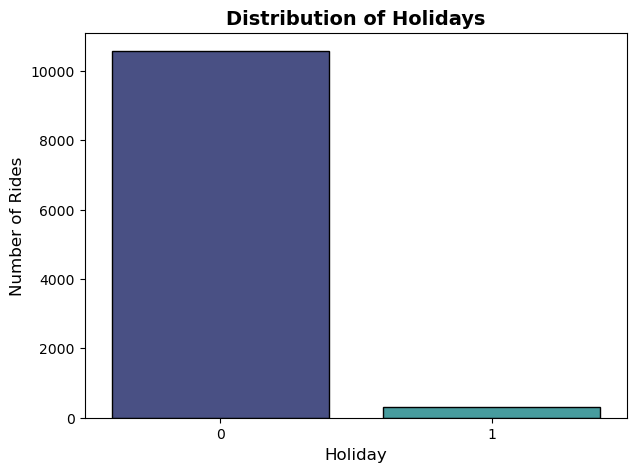

In [75]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="holiday", palette="mako", edgecolor="black")
plt.xlabel("Holiday", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Distribution of Holidays", fontsize=14, weight='bold')
plt.show()

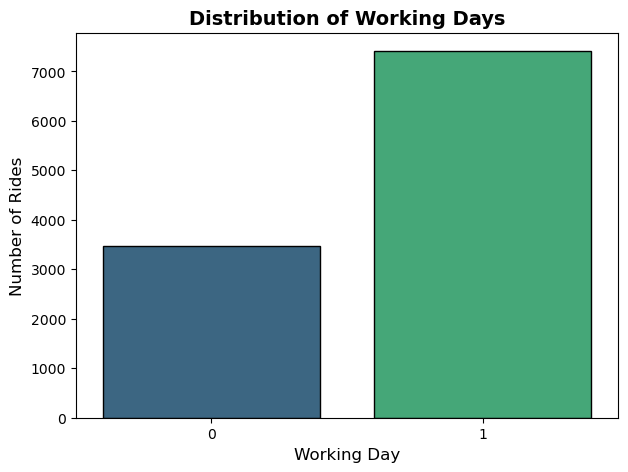

In [76]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="workingday", palette="viridis", edgecolor="black")
plt.xlabel("Working Day", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Distribution of Working Days", fontsize=14, weight='bold')
plt.show()

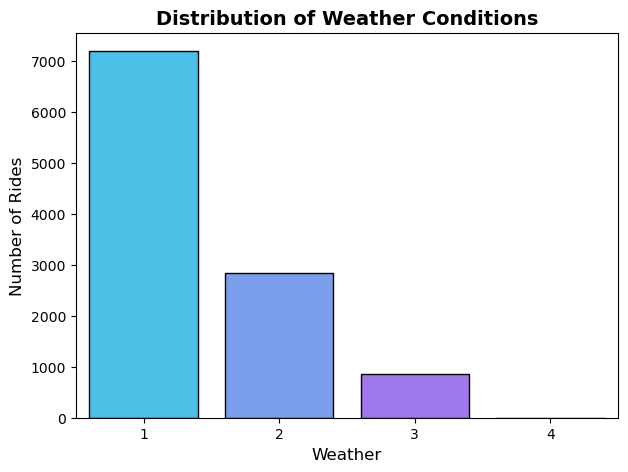

In [77]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="weather", palette="cool", edgecolor="black")
plt.xlabel("Weather", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Distribution of Weather Conditions", fontsize=14, weight='bold')
plt.show()


### <font color='purple'>Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.</font>




In [78]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

**season vs Count**

- Null Hypothesis (H₀):	There is no significant difference in average bike rentals (count) across the four seasons.
- Alternative Hypothesis (H₁): There is at least one season where the average bike rentals (count) is significantly different.

In [105]:
from scipy.stats import f_oneway

In [113]:
df.groupby("season")["count"].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

In [107]:
spring = df[df["season"] == 1]["count"]
summer = df[df["season"] == 2]["count"]
fall = df[df["season"] == 3]["count"]
winter = df[df["season"] == 4]["count"]

In [146]:
from scipy.stats import levene

stats, p_value = levene(spring, summer, fall, winter)
stats, p_value

(187.7706624026276, 1.0147116860043298e-118)

In [109]:
f, p = f_oneway(spring, summer, fall, winter)
f, p

(236.94671081032106, 6.164843386499654e-149)

In [144]:
from scipy.stats import kruskal

stats, p_value = kruskal(spring, summer, fall, winter)
stats, p_value

(699.6668548181988, 2.479008372608633e-151)

In [110]:
if p < 0.05:
    print("There is at least one season where the average bike rentals (count) is significantly different.")
else:
    print("There is no significant difference in average bike rentals (count) across the four seasons.")

There is at least one season where the average bike rentals (count) is significantly different.


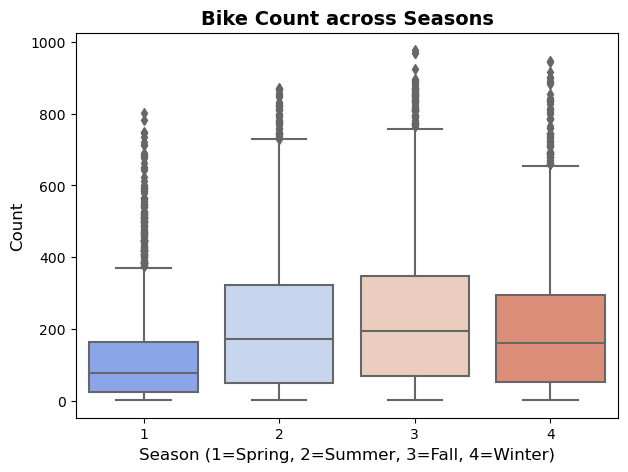

In [80]:
plt.figure(figsize=(7,5))
sns.boxplot(x='season', y='count', data=df, palette='coolwarm')
plt.title('Bike Count across Seasons', fontsize=14, weight='bold')
plt.xlabel('Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Holiday vs Count**

- Null Hypothesis (H₀):	There is no significant difference in average bike rentals (count) between holidays and non-holidays.
- Alternative Hypothesis (H₁): There is a significant difference in average bike rentals between holidays and non-holidays.

In [114]:
from scipy.stats import ttest_ind

In [115]:
df.groupby("holiday")["count"].mean()

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

In [118]:
holiday = df[df["holiday"] == 1]["count"]
non_holiday = df[df["holiday"] == 0]["count"]

In [126]:
t, p = ttest_ind(non_holiday, holiday, alternative = "two-sided")
t, p

(0.5626388963477119, 0.5736923883271103)

In [127]:
if p < 0.05:
    print("There is a significant difference in average bike rentals between holidays and non-holidays.")
else:
    print("There is no significant difference in average bike rentals (count) between holidays and non-holidays.")

There is no significant difference in average bike rentals (count) between holidays and non-holidays.


In [148]:
from scipy.stats import levene

stats, p_value = levene(non_holiday, holiday)
stats, p_value

(1.222306875221986e-06, 0.9991178954732041)

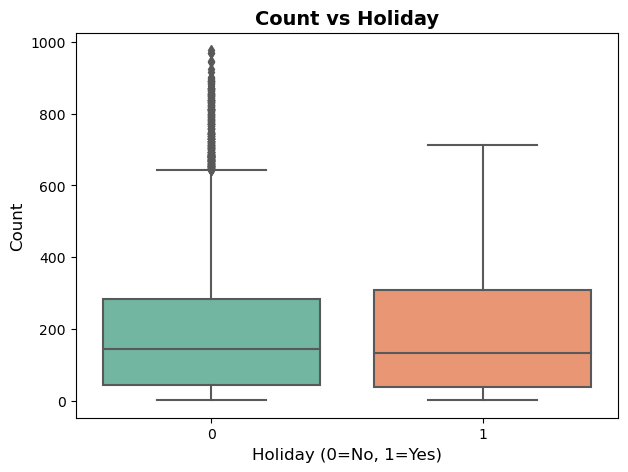

In [128]:
plt.figure(figsize=(7,5))
sns.boxplot(x='holiday', y='count', data=df, palette='Set2')
plt.title('Count vs Holiday', fontsize=14, weight='bold')
plt.xlabel('Holiday (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Workingday vs Count**

- Null Hypothesis (H₀):There is no significant difference in average bike rentals (count) between working days and non-working days..
- Alternative Hypothesis (H₁): There is a significant difference in average bike rentals between working days and non-working days. 

In [129]:
df.groupby("workingday")["count"].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

In [130]:
working = df[df["workingday"] == 1]["count"]
non_working = df[df["workingday"] == 0]["count"]

In [132]:
t, p = ttest_ind(working, non_working, alternative = "two-sided")
t, p

(1.2096277376026694, 0.22644804226361348)

In [133]:
if p< 0.05:
    print("Bike rentals are significantly different between working and non-working days.")
else:
    print("No significant difference in bike rentals between working and non-working days.")

No significant difference in bike rentals between working and non-working days.


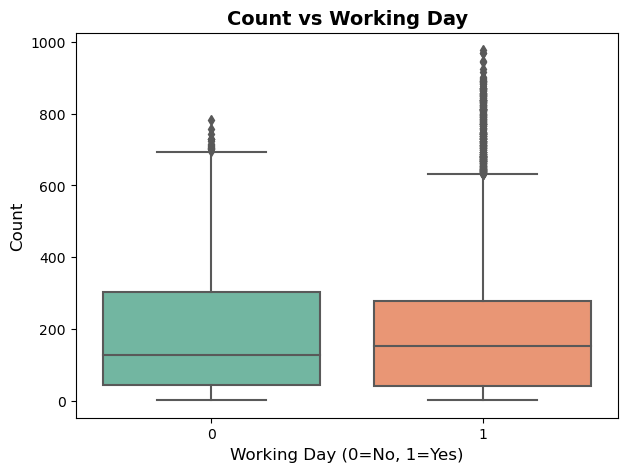

In [82]:
plt.figure(figsize=(7,5))
sns.boxplot(x='workingday', y='count', data=df, palette='Set2')
plt.title('Count vs Working Day', fontsize=14, weight='bold')
plt.xlabel('Working Day (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Weather vs Count**

- Null Hypothesis (H₀):There is no significant difference in average bike rentals (count) across different weather conditions.
- Alternative Hypothesis (H₁): There is at least one weather condition where the average bike rentals (count) are significantly different.

In [134]:
df.groupby("weather")["count"].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

In [135]:
clear = df[df["weather"] == 1]["count"]
Mist = df[df["weather"] == 2]["count"]
Light_rain = df[df["weather"] == 3]["count"]
Heavy_rain = df[df["weather"] == 1]["count"]

In [137]:
f, p = f_oneway(clear, Mist, Light_rain, Heavy_rain )
f, p

(71.16449949906588, 9.512123371458035e-46)

In [141]:
from scipy.stats import kruskal

In [143]:
stats, p_value= kruskal(clear, Mist, Light_rain, Heavy_rain)
stats, p_value

(225.42121889128447, 1.3513120710098779e-48)

In [138]:
if p < 0.05:
    print("There is at least one weather condition where the average bike rentals (count) are significantly different.")
else:
    print("There is no significant difference in average bike rentals (count) across different weather conditions")

There is at least one weather condition where the average bike rentals (count) are significantly different.


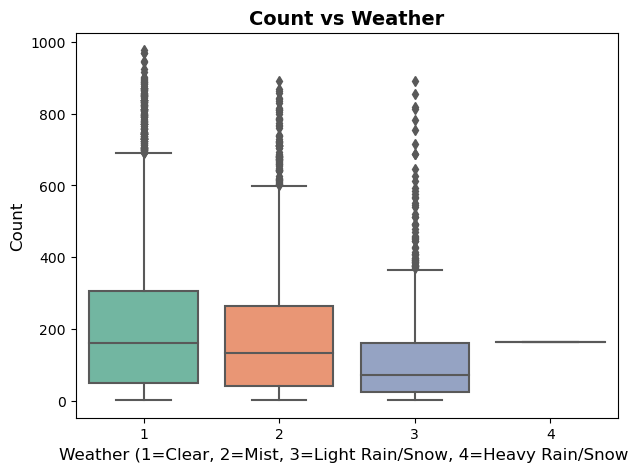

In [83]:
plt.figure(figsize=(7,5))
sns.boxplot(x='weather', y='count', data=df, palette='Set2')
plt.title('Count vs Weather', fontsize=14, weight='bold')
plt.xlabel('Weather (1=Clear, 2=Mist, 3=Light Rain/Snow, 4=Heavy Rain/Snow)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Temp vs Count**

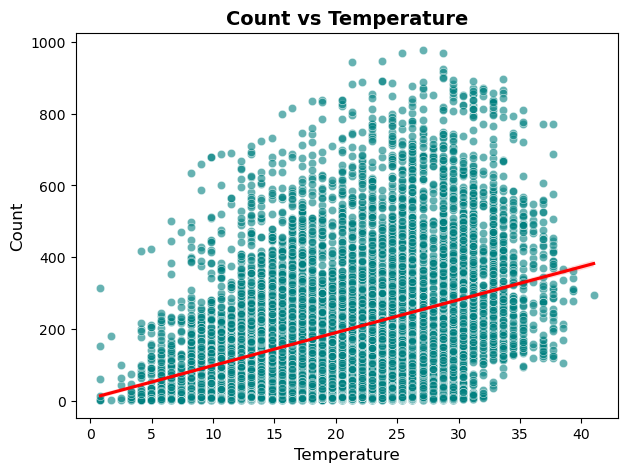

In [90]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='temp', y='count', data=df, color='teal', alpha=0.6)
sns.regplot(x='temp', y='count', data=df, scatter=False, color='red')
plt.title('Count vs Temperature', fontsize=14, weight='bold')
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Atemp vs Count**

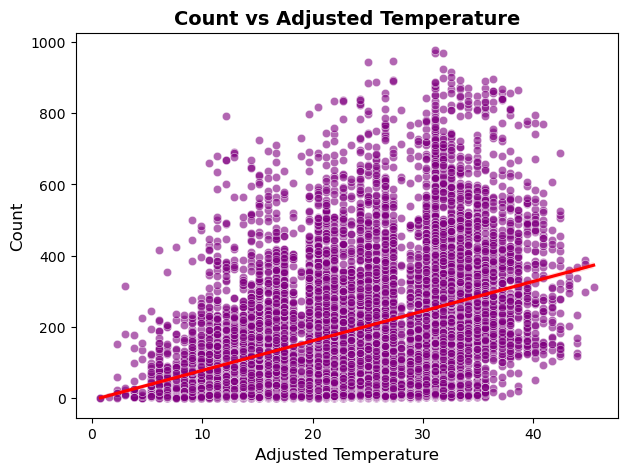

In [91]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='atemp', y='count', data=df, color='purple', alpha=0.6)
sns.regplot(x='atemp', y='count', data=df, scatter=False, color='red')
plt.title('Count vs Adjusted Temperature', fontsize=14, weight='bold')
plt.xlabel('Adjusted Temperature', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Humidity vs Count**

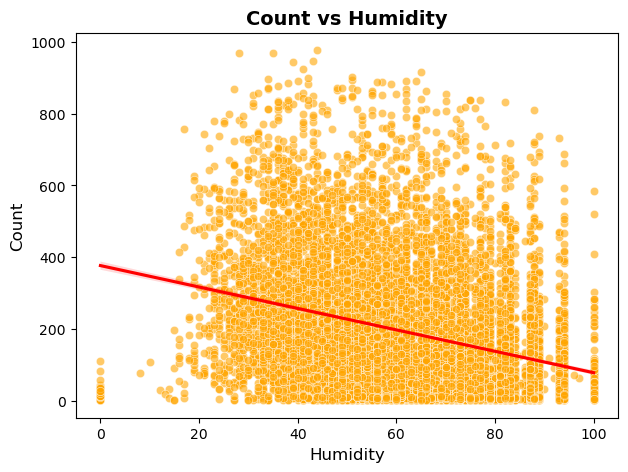

In [92]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='humidity', y='count', data=df, color='orange', alpha=0.6)
sns.regplot(x='humidity', y='count', data=df, scatter=False, color='red')
plt.title('Count vs Humidity', fontsize=14, weight='bold')
plt.xlabel('Humidity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


**Windspeed vs Count**

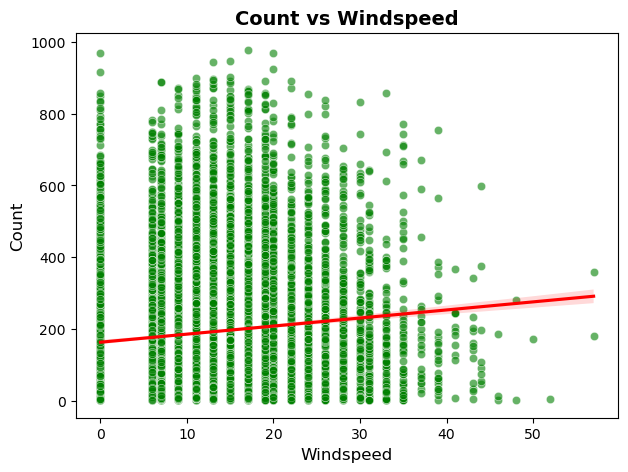

In [93]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='windspeed', y='count', data=df, color='green', alpha=0.6)
sns.regplot(x='windspeed', y='count', data=df, scatter=False, color='red')
plt.title('Count vs Windspeed', fontsize=14, weight='bold')
plt.xlabel('Windspeed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


**Casual vs Count**

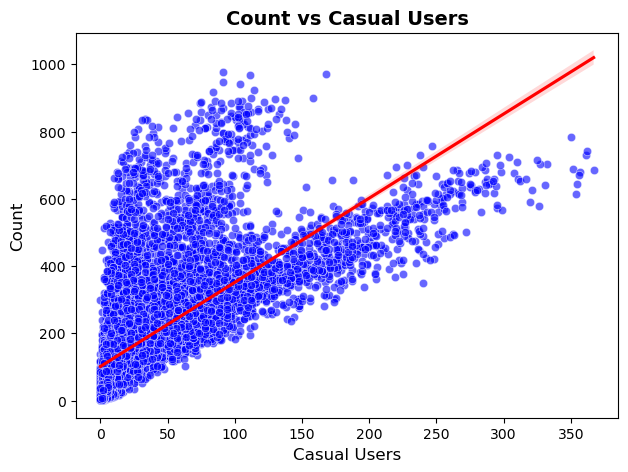

In [94]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='casual', y='count', data=df, color='blue', alpha=0.6)
sns.regplot(x='casual', y='count', data=df, scatter=False, color='red')
plt.title('Count vs Casual Users', fontsize=14, weight='bold')
plt.xlabel('Casual Users', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Registered vs Count**

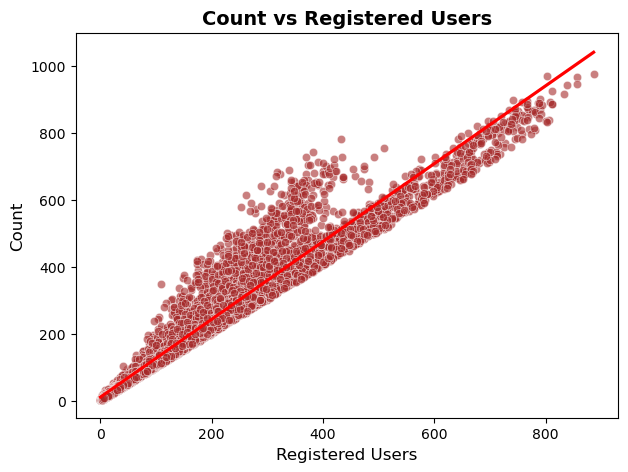

In [102]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='registered', y='count', data=df, color='brown', alpha=0.6)
sns.regplot(x='registered', y='count', data=df, scatter=False, color='red')
plt.title('Count vs Registered Users', fontsize=14, weight='bold')
plt.xlabel('Registered Users', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

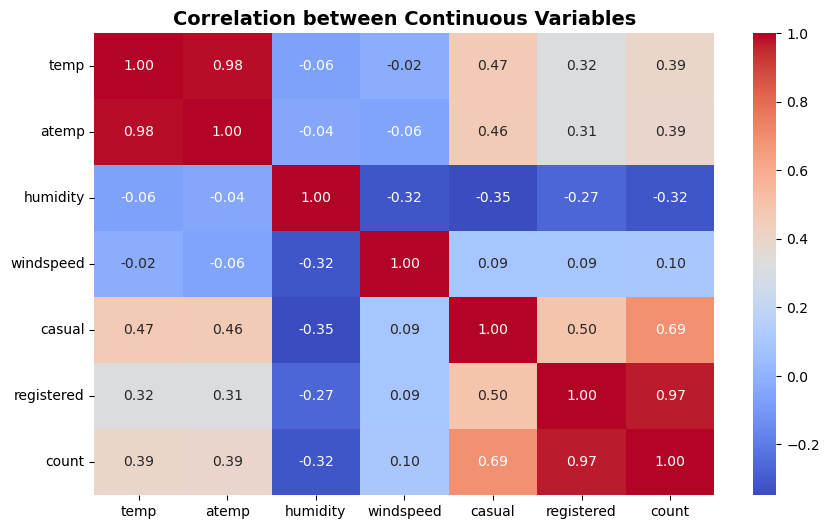

In [103]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['temp','atemp','humidity','windspeed','casual','registered','count']].corr(), 
            annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation between Continuous Variables", fontsize=14, weight='bold')
plt.show()
